# Lesson 9 Questions

In [6]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Question 1

First we are finding the average tip for males and females respectively and printing them out. Then, we plot a histogram of tip distribution sorted by Males and Females, and sorted by Lunch and Dinner.

3.0896178343949043
2.8334482758620685


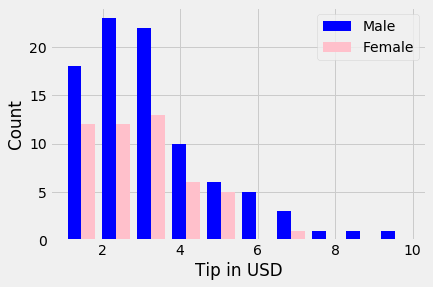

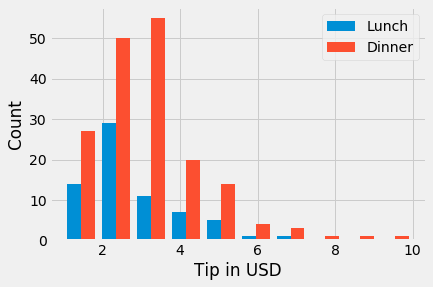

In [143]:
tips=Table.read_table('tips.csv')
genderTip=tips.select(2,1)
maleTip=genderTip.where('sex',are.equal_to('Male')).relabeled(1,'mTip')
maleMean=maleTip.column('mTip').mean()
femaleTip=genderTip.where('sex',are.equal_to('Female')).relabeled(1,'fTip')
femaleMean=femaleTip.column('fTip').mean()
print(maleMean)
print(femaleMean)

plots.hist([maleTip.group('mTip').column('mTip'),femaleTip.group('fTip').column('fTip')],
           color=['blue','pink'],label=['Male','Female'])
plots.legend(loc='upper right')
plots.xlabel('Tip in USD')
plots.ylabel('Count')
plots.show()

plots.hist([tips.where('time',are.equal_to('Lunch')).column('tip'),
            tips.where('time',are.equal_to('Dinner')).column('tip')],label=['Lunch','Dinner'])
plots.legend(loc='upper right')
plots.xlabel('Tip in USD')
plots.ylabel('Count')
plots.show()

# Question 2

Below we have defined a function weekday_to_num, which takes in a String and converts it to the corresponding day of the week.

In [30]:
#Question 2

def weekday_to_num(x):
    if(x=='Mon'):
        return(1)
    if(x=='Tues'):
        return(2)
    if(x=='Wed'):
        return(3)
    if(x=='Thur'):
        return(4)
    if(x=='Fri'):
        return(5)
    if(x=='Sat'):
        return(6)
    if(x=='Sun'):
        return(7)

# Question 3

Below we have applied the function defined in question 2 to the column 'day' in the table tips, and attached a column with these values to the table tips. The resulting aggregate table is called tips1.

In [38]:
#Question 3
tips1=tips.with_column('weekday_num',tips.apply(weekday_to_num,'day'))
tips1

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


# Question 4
 
A function called est_tip is defined, averaging the value tipped from the table tips within a certain window of values. The result is an attempt to predict the amount a customer will tip based on the total pretip bill amount

In [115]:
#Question 4
def est_tip(tBill,window):
    predTip=np.average(tips.where('total_bill',are.between(tBill-window,tBill+window)).column('tip'))
    return predTip

# Question 5

The est_tip function is applied to the column total_bill in the table tips. The results are placed into a column and appended onto the table tips, creating the resulting table tips2. The predicted tables are placed on scatter plot against the total bill (along with the actual corresponding tips), allowing for an easy graphical comparison between the predicted values and actual dataset values. Additionally, the window variable allows the user to easily adjust the range used by est_tip to create a prediction. 

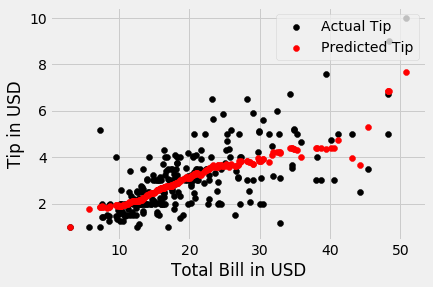

In [142]:
#Question 5
tipWindow=3

vEst_tip=np.vectorize(est_tip)
tips2=tips.with_column('Predicted Tip',vEst_tip(tips.column('total_bill'),tipWindow))
tips2

plots.scatter(tips2.column('total_bill'),
              tips2.column('tip'),color='black',label='Actual Tip')
plots.scatter(tips2.column('total_bill'),
              tips2.column('Predicted Tip'),color='red',label='Predicted Tip')
plots.legend(loc='upper right')
plots.xlabel('Total Bill in USD')
plots.ylabel('Tip in USD')
plots.show()